<a href="https://colab.research.google.com/github/thotasriharsha/GENERATIVE-AI2/blob/main/2303A52159_WEEK_8_ASS_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to predict the quality of wine using the Keras deep
learning library
2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.
3. (1 ponto) Build the application by loading the saved ANN model.



In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Google Drive link (download it manually)
url = "/content/winequality-red.csv"
df = pd.read_csv(url)

# Preview the dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
# Assuming 'quality' is the target column and the rest are features
X = df.drop(columns='quality')  # Feature columns
y = df['quality']  # Target column (wine quality)

# Scale the feature columns using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')


X_train shape: (1279, 11), X_test shape: (320, 11)


In [3]:
# Build the model
model = Sequential()

# Adding the hidden layers
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(20, activation='relu'))  # Second hidden layer
model.add(Dense(25, activation='relu'))  # Third hidden layer
model.add(Dense(10, activation='relu'))  # Fourth hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,328 (5.19 KB)

 Trainable params: 1,328 (5.19 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0000e+00 - loss: 1.3758 - val_accuracy: 0.0000e+00 - val_loss: 1.2902
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1.3691 - val_accuracy: 0.0000e+00 - val_loss: 1.2867
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.3382 - val_accuracy: 0.0000e+00 - val_loss: 1.2832
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 1.3683 - val_accuracy: 0.0000e+00 - val_loss: 1.2797
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 1.3457 - val_accuracy: 0.0000e+00 - val_loss: 1.2761
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1.3690 - val_accuracy: 0.0000e+00 - val_loss: 1.2725
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.3392 - val_accuracy: 0.0000e+00 - val_loss: 1.2688
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.8625  
Test accuracy: 0.00%
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0]
 [84 46  0  0  0  0  0  0]
 [78 54  0  0  0  0  0  0]
 [16 26  0  0  0  0  0  0]
 [ 3  2  0  0  0  0  0  0]]


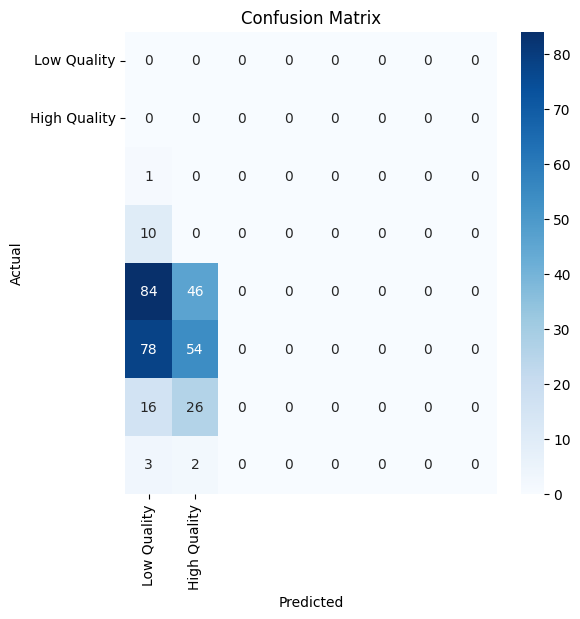

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00      10.0
           5       0.00      0.00      0.00     130.0
           6       0.00      0.00      0.00     132.0
           7       0.00      0.00      0.00      42.0
           8       0.00      0.00      0.00       5.0

    accuracy                           0.00     320.0
   macro avg       0.00      0.00      0.00     320.0
weighted avg       0.00      0.00      0.00     320.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [5]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'], yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

In [6]:
# Save the trained model to an .h5 file
model.save('wine_quality_model.h5')
print("Model saved as 'wine_quality_model.h5'")


Model saved as 'wine_quality_model.h5'


In [7]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('wine_quality_model.h5')

# Make a prediction on a new example (let's use the first row from the test set)
new_data = X_test[0].reshape(1, -1)  # Reshape the data to match the input shape
prediction = (loaded_model.predict(new_data) > 0.5).astype(int)

# Print the prediction result
print(f'Prediction: {"High Quality" if prediction == 1 else "Low Quality"}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction: High Quality
